# Домашняя работа №1
Майнор по анализу данных 2016

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

<hr\>

# Регрессия с SVM (3 балла)

Неудивительно, что принципы SVM так же прекрасно ложатся на задачу регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

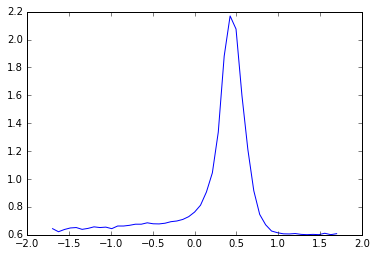

In [45]:
data = pd.read_csv('titanium.csv')
x = scale(data[data.columns[:-1]])
y = data['y']

plt.plot(x, y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

Сформируем функцию, которая будет обучать svm с определенным видом ядра (который введет пользователь), строить график зависимости ошибки алгоритма от параметра С и график с предсказанием алгоритма (для наилучшего параметра С)

In [51]:
def Draw_plots(kernel):
    C = np.logspace(-2, 2, 10)
    err_value = []

    for c_coef in C:
        if kernel == 'linear':
            svm = SVR(kernel = 'linear', C = c_coef, epsilon=0.01)
        elif kernel == 'rbf':
            svm = SVR(kernel = 'rbf', C = c_coef, epsilon=0.01, gamma=6, coef0=1)
        else:
            svm = SVR(kernel = 'poly', C = c_coef, epsilon=0.01, gamma=6, coef0=1, degree=3)
        ans = svm.fit(x, y).predict(x)
        err_value.append(mean_absolute_error(y, ans))
    
    plt.figure(figsize=(7, 5))
    plt.plot(C, err_value)
    plt.xscale('log')
    plt.xlabel('log_C')
    plt.ylabel('Error')
    plt.title('Error in accordance to C with %s kernel' % kernel)    
    
    best_C = C[np.argmin(err_value)] # optimal C coefficient
    ans = svm.fit(x, y).predict(x)
 
    plt.figure(figsize=(7, 5))
    plt.plot(x, ans)
    plt.title('Predictions with %s kernel' % kernel)
    plt.plot(x,y, 'o')
    plt.show

### Plots for linear kernel

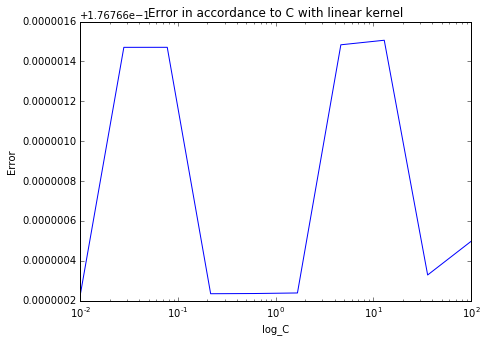

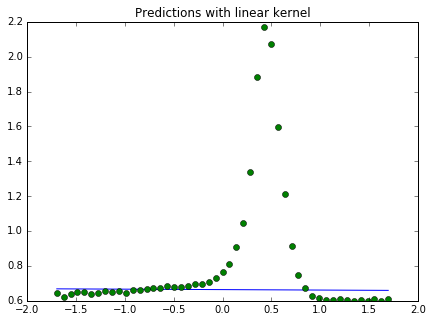

In [52]:
Draw_plots('linear')

Как видно из данного графика, наш алгоритм с линейным ядром недообучается, его результаты далеки от идеальных

### Plots for RBF kernel

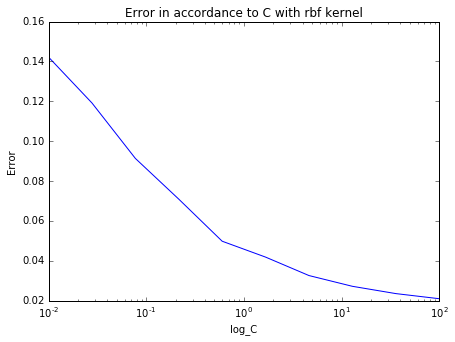

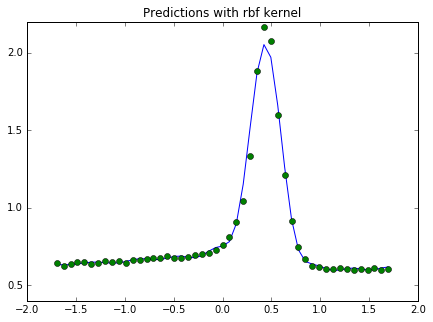

In [53]:
Draw_plots('rbf')

Предсказания svm с полиномиальным ядром хороши, это значит, что алгоритм качетсвенно обучился на наших данных.

### Plots for poly kernel

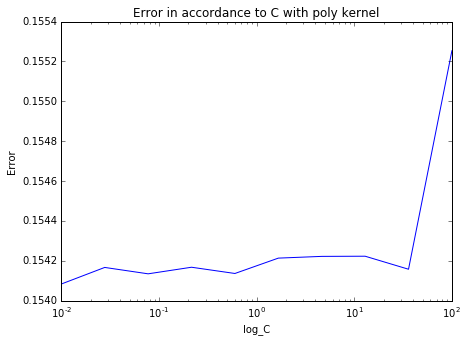

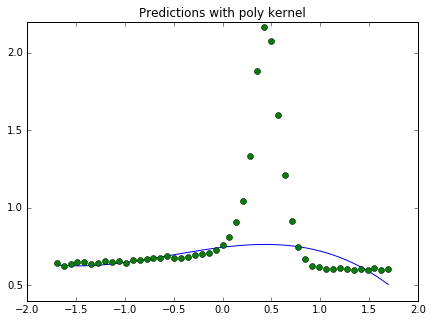

In [54]:
Draw_plots('poly')

Предсказания svm с полиномиальным ядром лучше, чем с линейным, но они также далеки от совершенства.

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [56]:
en_data = pd.read_table('war_and_peace_en.txt', header=None, names = ['word', 'label'])
en_data['label'] = 1

es_data = pd.read_table('war_and_peace_es.txt', header=None, names = ['word', 'label'])
es_data['label'] = 0

data = pd.concat((es_data, en_data), axis=0, ignore_index=True)
data.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [57]:
from sklearn.cross_validation import train_test_split

In [58]:
RND_SEED = 2400
data = data.sample(n = 1500, random_state=RND_SEED).reset_index(drop = True)

X, y = data.index.values.reshape((-1,1)), data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= RND_SEED)

## Расчет ядра (3 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).

In [59]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]


Сформируем функцию нашего собственного ядра, которая будет искать расстояние Левенштейна между словами в выборках и возводить его в экспоненту.
Эту функцию мы будем использовать в нашем svm в будущем для предсказания.

In [65]:
def string_kernel(U, V):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0, U.shape[0]):
        for j in range(0, V.shape[0]):
            first, second = data['word'].loc[int(U[i])], data['word'].loc[int(V[j])]
            diff = wfi_levenshtein(first, second)
            G[i, j] = np.exp(-diff)
    return G

In [37]:
G = string_kernel(X_train, X_train)

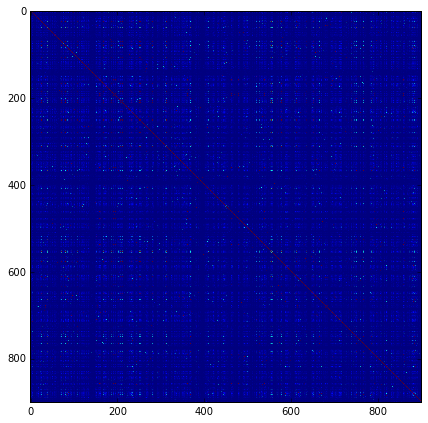

In [61]:
plt.figure(figsize=(10, 7))
plt.imshow(G)

###### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [64]:
C = np.arange(0.5, 10, 2)

for c_coef in C:
    svm = SVC(C=c_coef, kernel=string_kernel)
    svm = svm.fit(X_train, y_train)
    
    train_acc = round(accuracy_score(y_train, svm.predict(X_train)), 2)
    test_acc = round(accuracy_score(y_test, svm.predict(X_test)), 2)
    
    print("Accuracy for C=%f \ntrain: %f  test: %f" % (c_coef, train_acc, test_acc))

Accuracy for C=0.500000 
train: 0.890000  test: 0.800000
Accuracy for C=2.500000 
train: 0.990000  test: 0.840000
Accuracy for C=4.500000 
train: 0.990000  test: 0.850000
Accuracy for C=6.500000 
train: 0.990000  test: 0.850000
Accuracy for C=8.500000 
train: 0.990000  test: 0.850000


Считаю, что со сформированной ядровой функцией получилось добиться неплохих результатов на предсказании.